keras CNN mnist

In [7]:
# 引用套件
# 開源神經網路庫
from tensorflow import keras
# 簡單的模型，單一輸入、單一輸出，按順序一層(Dense)一層的由上往下執行
from keras.models import Sequential
# Dense:全連接層，Conv2D:二維卷積層，MaxPooling2D:二維池化層，Flatten:將多維變一維
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
# 定義模型
model=Sequential()
# Conv2D(filters:輸出面數或是深度，通常是4的倍數，kernel_size(長,寬):卷積核大小，一般為正方形，邊長為奇數，便於尋找中心點。
# input_shape(高,寬,深):當作爲模型的第一層時,需要指出輸入的形狀，activation:函數)
model.add(Conv2D(filters=16, kernel_size=(5, 5), input_shape=(28, 28, 1), activation='relu'))
# MaxPooling2D(pool_size:池化視窗的大小，通常設為2)
model.add(MaxPooling2D(pool_size=(2, 2)))
# Conv2D(filters:輸出面數或是深度，通常是4的倍數，kernel_size(長,寬):卷積核大小，一般為正方形，邊長為奇數，便於尋找中心點，activation:函數)
#model.add(Conv2D(filters=36, kernel_size=(5, 5), activation='relu'))
# MaxPooling2D(pool_size:池化視窗的大小，通常設為2)
#model.add(MaxPooling2D(pool_size=(2, 2)))
# 將多維拉平成一維
model.add(Flatten())
# Add Input layer, 隱藏層(hidden layer) 有10個輸出變數
model.add(Dense(10, activation='softmax'))
# 顯示 Model output
model.summary()
# 編譯: 優化方法、選擇損失函數、成效衡量方式
model.compile(optimizer='rmsprop', loss='categorical_crossentropy', metrics=['accuracy'])

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 16)        416       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 12, 12, 16)       0         
 )                                                               
                                                                 
 flatten_2 (Flatten)         (None, 2304)              0         
                                                                 
 dense_10 (Dense)            (None, 10)                23050     
                                                                 
Total params: 23,466
Trainable params: 23,466
Non-trainable params: 0
_________________________________________________________________


In [8]:
# 手寫數字辨識資料集
mnist=keras.datasets.mnist
# 檢查使用者目錄下的.keras/datasets資料夾中，是否有mnist.npz
(train_data, train_label), (test_data, test_label) = mnist.load_data()
test_label_original=test_label #for crosstab
# 將整數標籤換為分類矩陣
train_label = keras.utils.to_categorical(train_label)
test_label = keras.utils.to_categorical(test_label)

11490434/11490434 [==============================] - 1s 0us/step


In [9]:
# 訓練 epochs執行次數
train_history=model.fit(train_data,train_label,epochs=10,batch_size=512)

Epoch 1/10
118/118 [==============================] - 6s 5ms/step - loss: 3.2902 - accuracy: 0.8277
Epoch 2/10
118/118 [==============================] - 0s 4ms/step - loss: 0.2360 - accuracy: 0.9567
Epoch 3/10
118/118 [==============================] - 0s 4ms/step - loss: 0.1103 - accuracy: 0.9727
Epoch 4/10
118/118 [==============================] - 0s 4ms/step - loss: 0.0711 - accuracy: 0.9811
Epoch 5/10
118/118 [==============================] - 0s 4ms/step - loss: 0.0502 - accuracy: 0.9860
Epoch 6/10
118/118 [==============================] - 0s 4ms/step - loss: 0.0387 - accuracy: 0.9883
Epoch 7/10
118/118 [==============================] - 0s 4ms/step - loss: 0.0299 - accuracy: 0.9910
Epoch 8/10
118/118 [==============================] - 0s 4ms/step - loss: 0.0233 - accuracy: 0.9925
Epoch 9/10
118/118 [==============================] - 1s 5ms/step - loss: 0.0197 - accuracy: 0.9941
Epoch 10/10
118/118 [==============================] - 1s 5ms/step - loss: 0.0155 - accuracy: 0.9949

In [10]:
# 顯示訓練成果(分數)
score=model.evaluate(test_data, test_label)
# 印出
print(score[1])

313/313 [==============================] - 1s 2ms/step - loss: 0.1228 - accuracy: 0.9787
0.9786999821662903


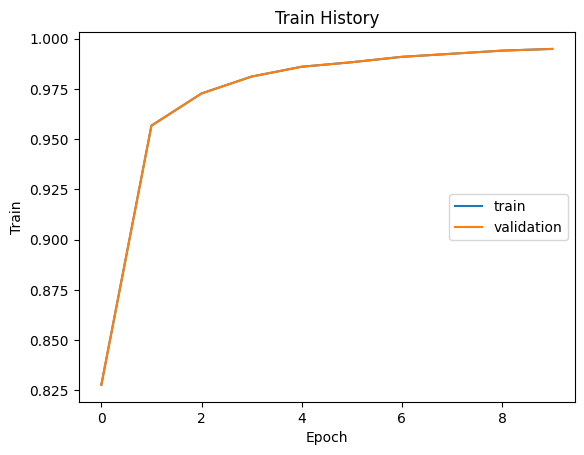

313/313 [==============================] - 1s 4ms/step
(10000, 10)


predict    0     1     2    3    4    5    6    7    8    9
label                                                      
0        968     0     2    0    0    1    4    1    3    1
1          0  1128     2    1    0    1    1    0    2    0
2          1     3  1004    6    2    0    3    7    6    0
3          1     0     1  992    0    9    0    2    3    2
4          0     2     1    0  950    0    4    3    6   16
5          1     0     1    8    0  877    1    0    4    0
6          5     3     0    1    1    6  938    0    4    0
7          0     3    10    4    1    0    0  999    5    6
8          9     0     3    5    0    1    2    2  949    3
9          0     5     1    6    3    6    0    2    4  982

In [11]:
# 繪製正確性與損失立歷史圖
# matplotlib.pyplot:繪圖模組
import matplotlib.pyplot as plt
# numpy:擴充程式庫，支援高階大規模的多維陣列與矩陣運算，也針對陣列運算提供大量的數學函數函式庫
import numpy as np

def show_train_history(train_history, train, validation):
    plt.plot(train_history.history[train])
    plt.plot(train_history.history[validation])
    plt.title('Train History')
    plt.ylabel('Train')
    plt.xlabel('Epoch')
    plt.legend(['train', 'validation'], loc='center right')
    plt.show()

show_train_history(train_history, 'accuracy', 'accuracy')
show_train_history(train_history, 'loss', 'loss')

# Confusion Matrix混淆矩陣
import pandas as pd
prediction = model.predict(test_data)
prediction_label=np.argmax(prediction,axis=1)
print(test_label.shape)
pd.crosstab(test_label_original, prediction_label, rownames=['label'], colnames=['predict'])